https://www.machinelearningplus.com/time-series/time-series-analysis-python/

https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/

Eventually want a box plot by month, and graphs organized by Zone to determine which gentrifies.

Need to show total amount of sales per year [x]

Need an area chart comparing sales of multifamily.

Parse dates and set index from pd.read_csv() in jsoncleaner

Want to show autocorrelation between 

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd 
%matplotlib inline
sns.set(style='darkgrid')
import matplotlib.dates as mdates

In [6]:
df1= pd.read_csv('nashville_20190813150235.csv')

In [7]:
START, END = '2015-01-01', '2019-06'
df1=df1[df1['Multiple Parcels Involved in Sale'] == 'No']
#Want to create a new column which is the mean sale price per square foot of a parcel in that neighborhood
df1['PPS']=df1['Sale Price']/df1['Square Footage Improved']
df1.PPS=df1.PPS.replace(np.inf, np.nan)
meanpps=df1.groupby('Neighborhood')['PPS'].mean().to_frame().rename(columns={'PPS':'NeighborhoodPPS'})
df=df1.merge(meanpps, how='left', left_on = 'Neighborhood',right_index=True)

# Indexing by date.
df['Most Recent Sale Date']=pd.to_datetime(df['Most Recent Sale Date'])
df['Sale Date']=pd.to_datetime(df['Sale Date'])
df = df.set_index('Most Recent Sale Date')

In [8]:
#Creating some useful time variables
year = df['Sale Date'].dt.year
month = df['Sale Date'].dt.month
weeklymean = df['Sale Price'].resample('W').mean()
monthlymean = df['Sale Price'].resample('M').mean()
yearlymean= df['Sale Price'].resample('Y').mean()
time = pd.date_range(start="2015-01-01", periods=42, freq="M")
monthlypps = df.PPS.resample('M').mean()
yearlypps=df.PPS.resample('Y').mean()

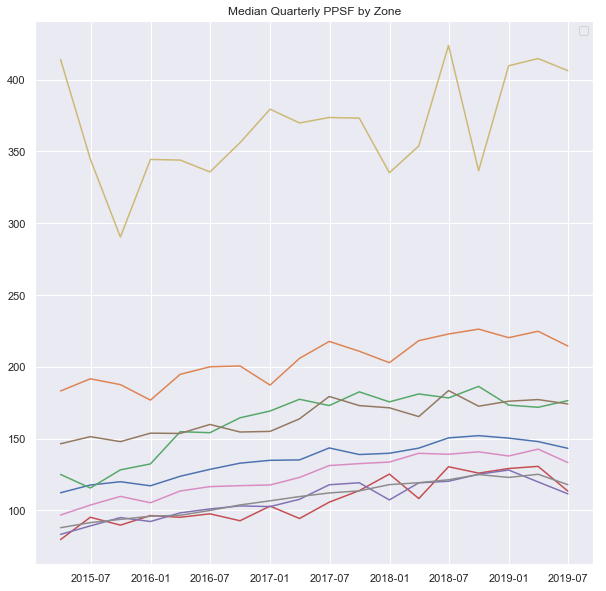

In [15]:
table1 = df.loc[START:END].groupby('Zone')['PPS']\
.resample('Q').median().to_frame()\
.pivot_table(index= 'Most Recent Sale Date',columns= 'Zone', values= 'PPS')

plt.figure(figsize=(10,10))
plt.legend(loc='best',labels='Zone')
plt.title('Median Quarterly PPSF by Zone')
plt.plot(table1)
#Clearly Zone 9, the downtown core, is the priciest. It's also the most volatile.
#Zone 2 is the second-highest. We should analyze that because we might fight unique characteristics
#Notably, almost all of the price increase results from these 2 zones.

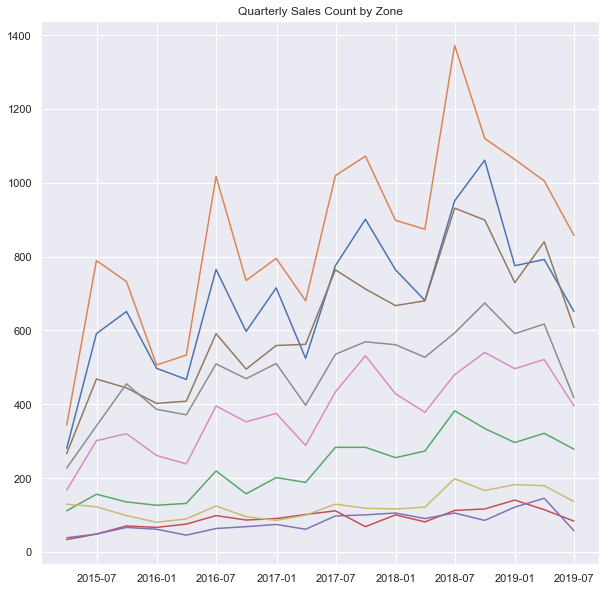

In [13]:
#Want a chart of sale counts by Zone
#Zone 2 shows the most activity.
table2 = df.loc[START:END].groupby('Zone')['PPS']\
.resample('Q').count().to_frame()\
.pivot_table(index= 'Most Recent Sale Date',columns= 'Zone', values= 'PPS')
plt.figure(figsize=(10,10))
plt.title('Quarterly Sales Count by Zone')
plt.plot(table2)

#There clearly needs to be some element of seasonality in our model, but I have no experience with that.

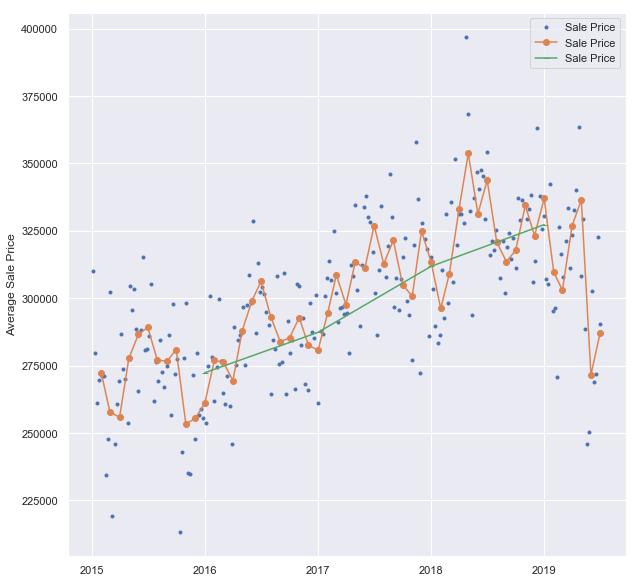

In [17]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(weeklymean.loc[START:END],marker='.',linestyle='None')
ax.plot(monthlymean.loc[START:END], marker='o')
ax.plot(yearlymean.loc[START:END], marker='_')
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_ylabel('Average Sale Price');
#Notice the uptick during summer

In [ ]:
#Want a stacked/area graph of sales by Zone and by Housing Type
#sns.lineplot(x=month, y = monthlypps, hue = 'Zone', data = df)

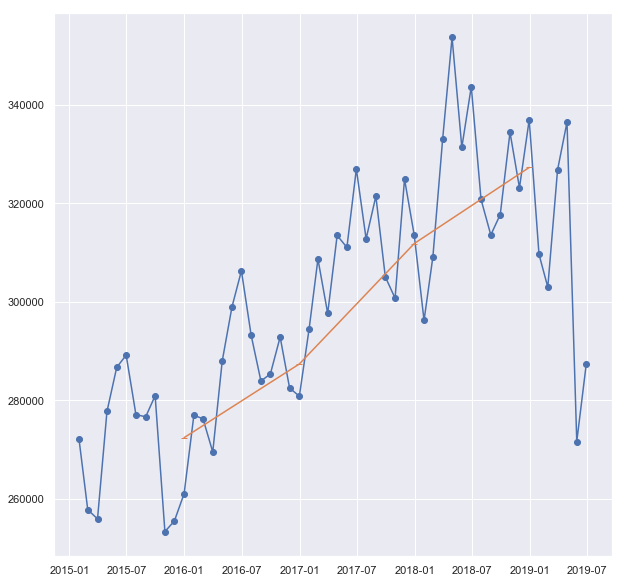

In [18]:
#Plotting PPS through time
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(monthlymean.loc[START:END], marker='o')
ax.plot(yearlymean.loc[START:END], marker='_')

In [19]:
import jsoncleaner
df['Assessment Improvement'] = jsoncleaner.dolcomma(df['Assessment Improvement'])
df['Assessment Land'] = jsoncleaner.dolcomma(df['Assessment Land'])
#Normalize it
df['Assessment Ratio'] = df['Assessment Improvement'] / (df['Assessment Land'] + df['Assessment Improvement'])

No handles with labels found to put in legend.


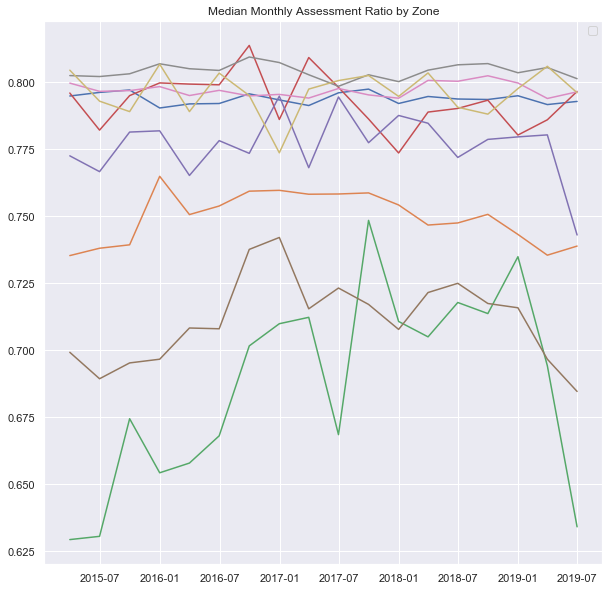

In [27]:
table = df.loc[START:END].groupby('Zone')['Assessment Ratio']\
.resample('Q').median().to_frame()\
.pivot_table(index= 'Most Recent Sale Date',columns= 'Zone', values= 'Assessment Ratio')
plt.figure(figsize=(10,10))
#plot=table.plot()
plt.title('Median Monthly Assessment Ratio by Zone')
plt.legend()
plt.plot(table)

In [29]:
#.resample('M').mean()
df.groupby(['Sale Date', 'Zone'])['PPS']\
.agg('mean')\
.to_frame()\
.reset_index()\
.pivot_table(index = 'Sale Date', columns= 'Zone', values= 'PPS').head(20)

Zone,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
Sale Date,,,,,,,,,
2015-01-02,115.506079,158.380160,102.633991,33.500000,82.268579,102.697001,89.152648,86.606463,431.672633
2015-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.829689,NaN
2015-01-05,111.877653,232.538639,112.512249,NaN,95.681760,111.688912,96.676236,70.554297,347.161886
2015-01-06,90.190589,190.163934,69.908958,NaN,NaN,53.025727,90.966700,77.937575,484.673315
2015-01-07,116.640282,293.801620,79.873685,54.718150,NaN,156.657645,97.640179,96.592394,281.007752
2015-01-08,101.040047,144.479729,120.738636,NaN,NaN,106.544943,94.750088,36.574731,545.862346
2015-01-09,110.029554,165.624536,75.156241,NaN,73.803664,138.277903,87.539943,85.325329,411.181052
2015-01-12,86.684128,142.256914,68.327578,NaN,NaN,237.312833,96.811292,79.501916,480.775430
2015-01-13,109.529040,229.110048,NaN,65.412304,100.126743,141.309284,NaN,77.382178,214.518519


In [31]:
dfz9= df[df.Zone==9]

C:\Users\alehe\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


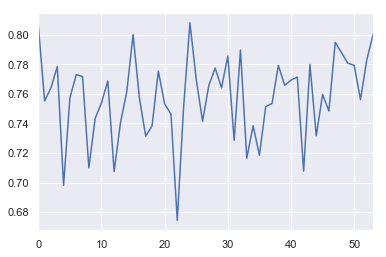

In [32]:
sns.tsplot(dfz9['Assessment Ratio'].loc[START:END].resample('M').mean(), interpolate=True)

C:\Users\alehe\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\alehe\Anaconda3\lib\site-packages\pandas\core\ops.py:1167: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


TypeError: invalid type comparison

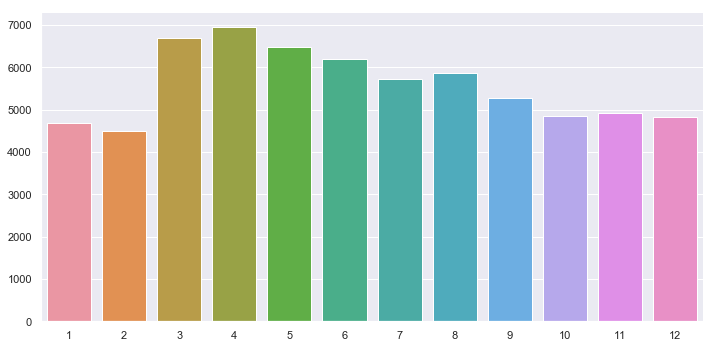

In [20]:
#Amount of sales by month.
g = sns.factorplot(month, data=df.loc[START:END], aspect=2, kind="count")

C:\Users\alehe\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


TypeError: invalid type comparison

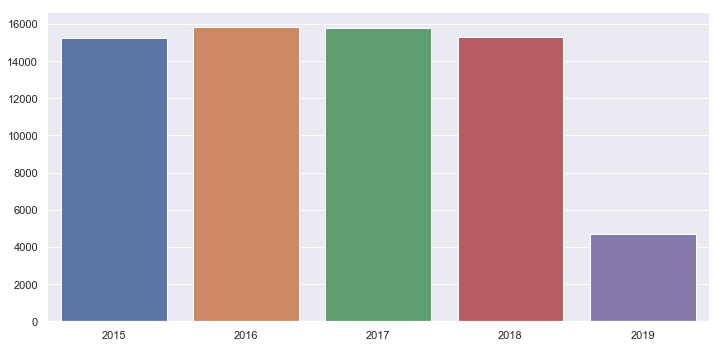

In [21]:
g = sns.factorplot(year, data=df.loc[START:END], aspect=2, kind="count")

In [23]:
from statsmodels.tsa.arima_model import ARIMA
from pandas import datetime as dt
ratio = df.loc[START:END].groupby('Zone')['Assessment Ratio'].resample('M').median()
pps = df.loc[START:END].groupby('Zone')['PPS']\
.resample('BM').median()

ARIMA(endog=ratio, exog=pps, order = (1,1,1))

ValueError: The indices for endog and exog are not aligned